In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/Ingeniería de características/P2022_MCD3735A/Módulo 5 - Transformación de variables numéricas/'

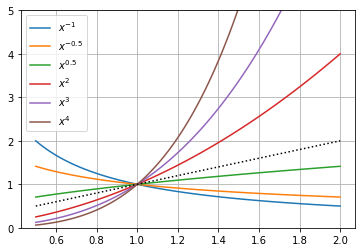

In [2]:
x=np.linspace(0.5,2,100)
N=[-1,-0.5,0.5,2,3,4]
for n in N:
  xp=x**n
  plt.plot(x,xp,label='$x^{%s}$'%str(n))
plt.plot(x,x,':k')
plt.legend(loc='best')
plt.ylim([0,5])
plt.grid()

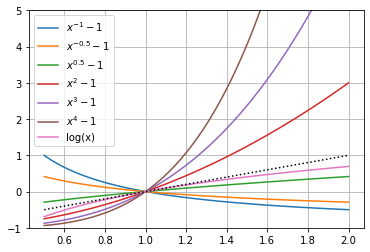

In [3]:
# Desplazamos la familia de funciones de potencia al punto (1,0) con la finalidad de comparar la función logaritmo con éstas.
for n in N:
  xp=x**n-1
  plt.plot(x,xp,label='$x^{%s}-1$'%str(n))
plt.plot(x,np.log(x),label='log(x)')
plt.plot(x,x-1,':k')
plt.legend(loc='best')
plt.ylim([-1,5])
plt.grid()

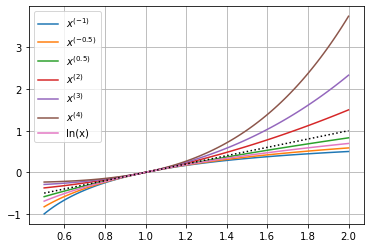

In [4]:
# Escalamos la familia de transformaciones desplazadas por un factor de 1/n
for n in N:
  xp=(x**n-1)/n
  plt.plot(x,xp,label='$x^{(%s)}$'%str(n))
plt.plot(x,np.log(x),label='ln(x)')
plt.plot(x,x-1,':k')
plt.legend(loc='best')
#plt.ylim([-1,5])
plt.grid()

In [5]:
from scipy.stats import boxcox

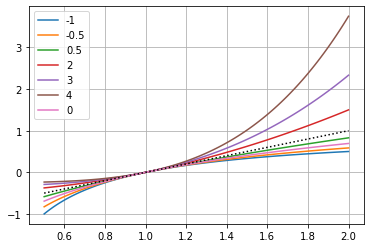

In [6]:
N.append(0)
for lmb in N:
  xp=boxcox(x,lmb)
  plt.plot(x,xp,label=str(lmb))
plt.plot(x,x-1,':k')
plt.legend(loc='best')
plt.grid()

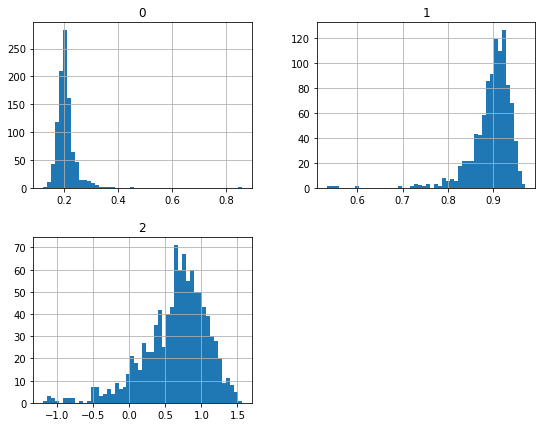

In [7]:
df=pd.read_csv(ruta+'num.csv')
H=df.hist(bins=50,figsize=(9,7))

lambda óptimo:  -11.394742571364604


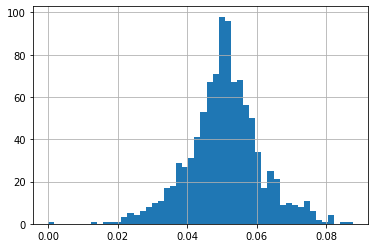

In [8]:
# Variable '0'
x=df['0']-df['0'].min()+1
xp,lmb=boxcox(x)
print('lambda óptimo: ',lmb)
plt.hist(xp,bins=50)
plt.grid()

In [9]:
pd.DataFrame(xp).skew()

0   -0.093338
dtype: float64

16.085152354766866


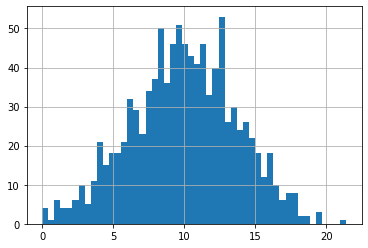

In [10]:
# Variable '1'
x=df['1']-df['1'].min()+1
xp,lmb=boxcox(x)
print(lmb)
plt.hist(xp,bins=50)
plt.grid()

In [11]:
pd.DataFrame(xp).skew()

0   -0.091563
dtype: float64

2.753700109259396


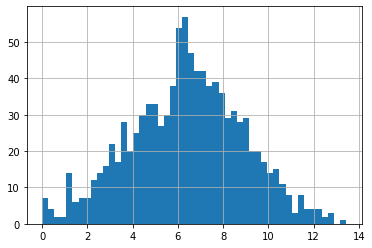

In [12]:
# Variable '2'
x=df['2']-df['2'].min()+1
xp,lmb=boxcox(x)
print(lmb)
plt.hist(xp,bins=50)
plt.grid()

In [13]:
pd.DataFrame(xp).skew()

0   -0.068733
dtype: float64

Modificando la transformación Box-Cox para valores negativos de $x$, se tiene:
$$
x'=\left\{
  \begin{array}{ll}
  \mathrm{sign}(x)\dfrac{|x|^\lambda-1}{\lambda}&\lambda\neq0\\
  \mathrm{sign}(x)\ln(|x|)&\lambda=0
  \end{array}
\right.
$$

In [14]:
def boxcoxS(x,lmb):
  if(lmb==0):
    return np.sign(x)*np.log(np.abs(x))
  else:
    return np.sign(x)*(np.abs(x)**lmb-1)/lmb

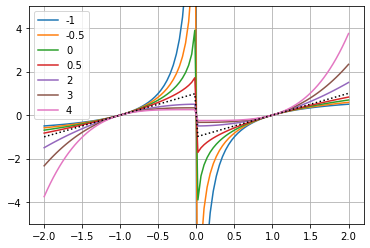

In [15]:
N=[-1,-0.5,0,0.5,2,3,4]
x=np.linspace(-2,2,100)
for lmb in N:
  xp=boxcoxS(x,lmb)
  plt.plot(x,xp,label=lmb)
plt.legend()
plt.plot(x,np.sign(x)*(np.abs(x)-1),':k')
plt.ylim([-5,5])
plt.grid()

Para evitar la indeterminación (discontinuidad) para los valores cercanos a cero, primero se desplazan los valores de forma que estén por encima de 1 o por debajo de -1:
$$
x'=\left\{
  \begin{array}{ll}
  \mathrm{sign}(x)\dfrac{(|x|+1)^\lambda-1}{\lambda}&\lambda\neq0\\
  \mathrm{sign}(x)\ln(|x|+1)&\lambda=0
  \end{array}
\right.
$$

In [16]:
def boxcoxSD(x,lmb):
  if(lmb==0):
    return np.sign(x)*np.log(np.abs(x)+1)
  else:
    return np.sign(x)*((np.abs(x)+1)**lmb-1)/lmb

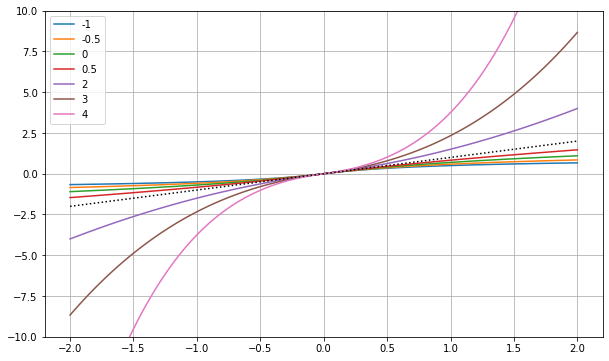

In [17]:
plt.figure(figsize=(10,6))
for lmb in N:
  xp=boxcoxSD(x,lmb)
  plt.plot(x,xp,label=lmb)
plt.plot(x,x,':k')
plt.legend()
plt.ylim([-10,10])
plt.grid()

# Transformación Yeo-Johnson

In [18]:
from scipy.stats import yeojohnson

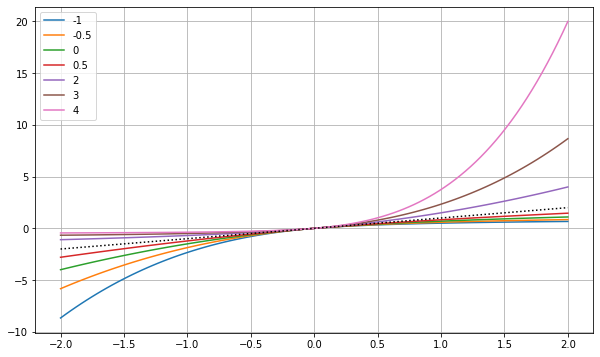

In [19]:
plt.figure(figsize=(10,6))
for lmb in N:
  xp=yeojohnson(x,lmb)
  plt.plot(x,xp,label=lmb)
plt.plot(x,x,':k')
plt.legend()
plt.grid()

0   -0.091697
dtype: float64

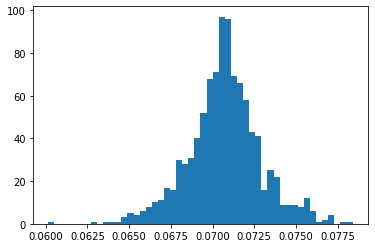

In [21]:
x=df['0']
xp,l=yeojohnson(x)
plt.hist(xp,bins=50)
pd.DataFrame(xp).skew()

In [22]:
l

-12.750781894524401

0   -0.091697
dtype: float64

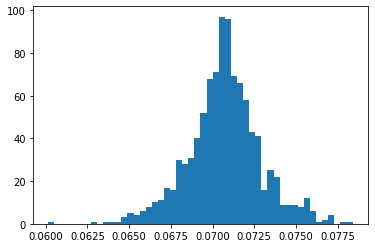

In [23]:
xp=boxcoxSD(x,l)
plt.hist(xp,bins=50)
pd.DataFrame(xp).skew()

0   -0.051932
dtype: float64

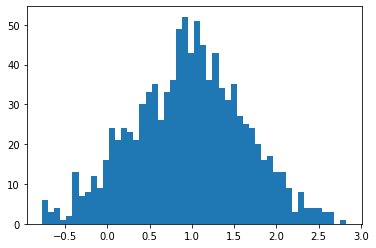

In [24]:
# Usando la variable con cruces por cero
x=df['2']
xp,l=yeojohnson(x)
plt.hist(xp,bins=50)
pd.DataFrame(xp).skew()

In [25]:
l

2.0334009440523304

2   -0.463272
dtype: float64

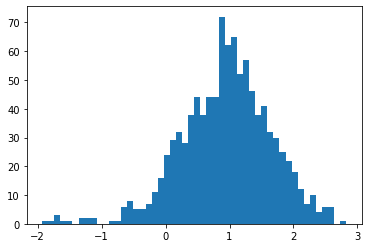

In [26]:
xp=boxcoxSD(x,l)
plt.hist(xp,bins=50)
pd.DataFrame(xp).skew()

# Regresión lineal

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [29]:
df=pd.read_csv(ruta+'regresion.csv')
df.head(2)

,x,y
0,0.100000,1.932916
1,0.101001,2.242087


In [30]:
X,x,Y,y=train_test_split(df[['x']],df['y'])
lin=LinearRegression()
lin.fit(X,Y)
lin.score(X,Y),lin.score(x,y)

(0.7843565259763866, 0.7949436029754291)

In [31]:
yt,l=yeojohnson(df['y'])
df['yt']=yt
X,x,Y,y=train_test_split(df[['x']],df['yt'])
lin2=LinearRegression()
lin2.fit(X,Y)
lin2.score(X,Y),lin2.score(x,y)

(0.8119339439031898, 0.809916147573979)

In [32]:
l

-0.1640699985520419

**Tarea:**

Definir en una función la inversa de Yeo-Johnson